In [1]:
# Import needed libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Load training and testing datasets

train_label = pd.read_csv("C:/Users/rmous/CSCI 191T/191T Assignment 3/Data/train.csv")
test_data = pd.read_csv("C:/Users/rmous/CSCI 191T/191T Assignment 3/Data/test.csv")

train_data = train_label.drop("label", axis = 1)

# Print rows and columns of both datasets
print(train_label.shape)
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(42000, 784)
(28000, 784)


In [3]:
# check out train data

train_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# check out test data

test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
# check out first 5 rows of train dataset with labels

train_label.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# check out first 5 rows of train data

train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# check out first 5 rows of test data

test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


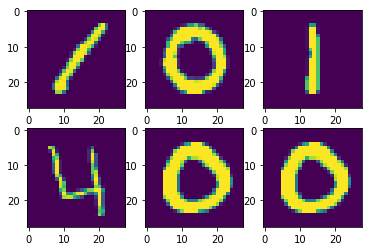

In [8]:
# Plot To See How The First 6 Images Look In Train Dataset

f, a = plt.subplots(nrows = 2, ncols = 3)

img1 = train_data.iloc[0].values.reshape(28, 28)
a[0,0].imshow(img1, interpolation = 'none')

img2 = train_data.iloc[1].values.reshape(28,28)
a[0,1].imshow(img2, interpolation = 'none')

img3 = train_data.iloc[2].values.reshape(28,28)
a[0,2].imshow(img3, interpolation = 'none')

img4 = train_data.iloc[3].values.reshape(28,28)
a[1,0].imshow(img4, interpolation = 'none')

img5 = train_data.iloc[4].values.reshape(28,28)
a[1,1].imshow(img5, interpolation = 'none')

img5 = train_data.iloc[4].values.reshape(28,28)
a[1,2].imshow(img5, interpolation = 'none')

plt.show()

In [9]:
# Split up my training dataset into training and testing sets within itself for PCA

train, test, val_labels, test_labels = train_test_split(train_data, train_label["label"], train_size = 0.8, random_state = 42)

# check new shape of split data
print(train.shape)
print(test.shape)
print(val_labels.shape)
print(test_labels.shape)

C:\Users\rmous\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 784)
(8400, 784)
(33600,)
(8400,)


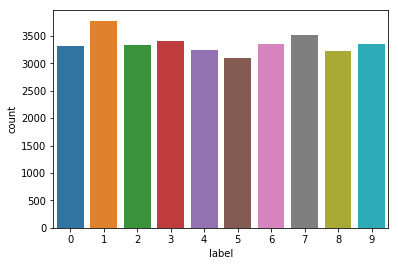

In [10]:
# Count amount of different digits in training and validation dataset

sns.countplot(val_labels)

In [11]:
# Setting up classifiers for SVM, KNN, and DT

clf1 = SVC(gamma = 0.1, kernel = "poly", random_state = 42)
clf2 = KNeighborsClassifier(n_neighbors = 4)
clf3 = DecisionTreeClassifier()

C:\Users\rmous\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmous\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
C:\Users\rmous\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


Text(0, 0.5, 'Variance')

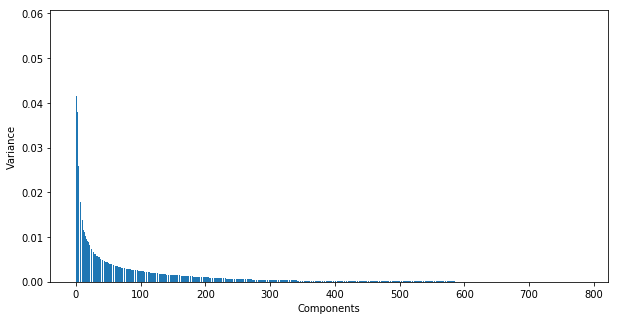

In [12]:
# Introduce PCA For Dimensionality Reduction

# First we standardized the training and validation data
standardized = StandardScaler().fit(train)
std_train = standardized.transform(train)
std_test = standardized.transform(test)

# Implement PCA
pca = PCA().fit(std_train)
train_pca = pca.transform(std_train)
test_pca = pca.transform(std_test)


# Calculate variance per components and the cumalative variance per component
variance = pca.explained_variance_ratio_
cumalative = pca.explained_variance_ratio_.cumsum()

# Plot the number of components versus the variance
plt.figure(figsize=(10,5))
ind = np.arange(len(variance)) 
plt.bar(ind,variance)
plt.xlabel("Components")
plt.ylabel("Variance")

In [13]:
# Keep 90% of information by keeping components up to .90 cumalative

components = len(cumalative[cumalative <= 0.90])
pca = PCA(n_components = components)
train_pca = pca.fit_transform(std_train)
test_pca = pca.fit_transform(std_test)

# Displat before and after shape of training and validation sets
print(std_train.shape)
print(train_pca.shape)
print(std_test.shape)
print(test_pca.shape)

(33600, 784)
(33600, 222)
(8400, 784)
(8400, 222)


In [14]:
# Train data with all three classifiers for PCA

clfa = clf1
clfb = clf2
clfc = clf3

clfa = clfa.fit(train_pca, val_labels)
clfb = clfb.fit(train_pca, val_labels)
clfc = clfc.fit(train_pca, val_labels)

In [15]:
# Test the test data with all three classifiers with PCA for dimensionality reduction

score1 = clfa.score(test_pca, test_labels)
score2 = clfb.score(test_pca, test_labels)
score3 = clfc.score(test_pca, test_labels)

print("Training and Validation Scores With PCA For SVM: ", score1)
print("Training and Validation Scores With PCA For KNN: ", score2)
print("Training and Validation Scores With PCA For DT: ", score3)

Training and Validation Scores With PCA For SVM:  0.12595238095238095
Training and Validation Scores With PCA For KNN:  0.1280952380952381
Training and Validation Scores With PCA For DT:  0.11678571428571428


In [16]:
# Now retrain SVM on whole training data set but with PCA dimensionality reduction applied

train_dataP = train_data
test_dataP = test_data

# First we standardized the training dataset
standardized = StandardScaler().fit(train_dataP)
std_train_data = standardized.transform(train_dataP) 
std_test_data = standardized.transform(test_dataP)

# Implement PCA
pca = PCA().fit(std_train_data)
train_pca_data = pca.transform(std_train_data)
test_pca_data = pca.transform(std_test_data)

# Calculate variance per components and the cumalative variance per component
variance = pca.explained_variance_ratio_
cumalative = pca.explained_variance_ratio_.cumsum()

# Keep 90% of information by keeping components up to .90 cumalative
components = len(cumalative[cumalative <= 0.90])
pca = PCA(n_components = components)
train_pca_data = pca.fit_transform(std_train_data)
test_pca_data = pca.fit_transform(std_test_data)


# Displat before and after shape of training and validation sets
print(std_train_data.shape)
print(train_pca_data.shape)
print(std_test_data.shape)
print(test_pca_data.shape)

C:\Users\rmous\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmous\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\rmous\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


(42000, 784)
(42000, 228)
(28000, 784)
(28000, 228)


In [17]:
# Train all the training dataset now

#clf0 = clf1
labels = train_label["label"]

#clf0 = clf0.fit(train_pca_data, labels)
clf1 = clf1.fit(train_data, labels)
clf2 = clf2.fit(train_data, labels)
clf3 = clf3.fit(train_data, labels)

In [19]:
# Predict the test dataset

#yhat0 = clf0.predict(test_pca_data)
yhat1 = clf1.predict(test_data)
yhat2 = clf2.predict(test_data)
yhat3 = clf3.predict(test_data)

In [20]:
# Create submission csv file for SVM achieved with PCA dimensinality reduction

"""test_data0 = test_data

test_data0["ImageId"] = test_data0.index+1
test_data0["Label"] = pd.Series(yhat0)
submission0 = test_data0[["ImageId", "Label"]]
submission0.to_csv("submission1.csv", index = False)

submission0.head()"""

'test_data0 = test_data\n\ntest_data0["ImageId"] = test_data0.index+1\ntest_data0["Label"] = pd.Series(yhat0)\nsubmission0 = test_data0[["ImageId", "Label"]]\nsubmission0.to_csv("submission1.csv", index = False)\n\nsubmission0.head()'

In [21]:
# Create submission csv file for SVM achieved 97.542% without PCA

test_data1 = test_data

test_data1["ImageId"] = test_data1.index+1
test_data1["Label"] = pd.Series(yhat1)
submission1 = test_data1[["ImageId", "Label"]]
submission1.to_csv("submission1.csv", index = False)

submission1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [22]:
# Create submission csv file for KNN achieved  without PCA

test_data2 = test_data

test_data2["ImageId"] = test_data2.index+1
test_data2["Label"] = pd.Series(yhat2)
submission2 = test_data2[["ImageId", "Label"]]
submission2.to_csv("submission2.csv", index = False)

submission2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [23]:
# Create submission csv file for DT achieved  without PCA

test_data3 = test_data

test_data3["ImageId"] = test_data3.index+1
test_data3["Label"] = pd.Series(yhat3)
submission3 = test_data3[["ImageId", "Label"]]
submission3.to_csv("submission3.csv", index = False)

submission3.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,9
